In [297]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [298]:
data_file =pd.read_csv("winequality-white.csv",delimiter=';')

In [299]:
data_file

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [300]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [301]:
#check for missing data
data_file.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [302]:
data_file.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [303]:
#amount of wine with above average quality
data_file.groupby('quality')['quality'].count()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

In [304]:
#given there are only 5 wines that are of quality 9, 175 of quality 8, for better accuracy we will classify everything 
#above 7 as good and everything under it as bad 
data_file['quality'] = [1 if i > 6 else 0 for i in data_file['quality']]

In [305]:
#Get the average value for each variable depending on the quality 
data_file.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,6.890594,0.281802,0.336438,6.703478,0.047875,35.517327,141.982934,0.994474,3.180847,0.487004,10.265215
1,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022


In [306]:
#Now that we loaded our data and we saw that there are no missing values we can start working
#First of all, we will check for correlations and see how we can proceed from there 
data_file.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.080748
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.067225
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.035330
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.117085
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.183118
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,-0.023413
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.162202
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.283871
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.093510
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.047410


Text(0.5, 1.0, 'Correlation Among Variables')

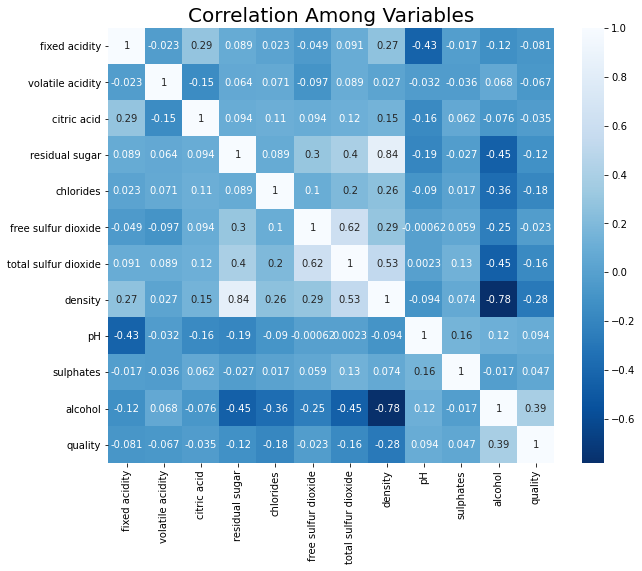

In [307]:
#The heatmap for the correlation among all the varaibles
plt.subplots(figsize =(10,8))
sns.heatmap(data_file.corr(),annot=True,cmap='Blues_r')
plt.title("Correlation Among Variables", fontsize = 20)

In [308]:
#since there's a strong correaltion betweeen residual sugar and density, we need to drop one of them
data_file = data_file.drop(columns=["density"])

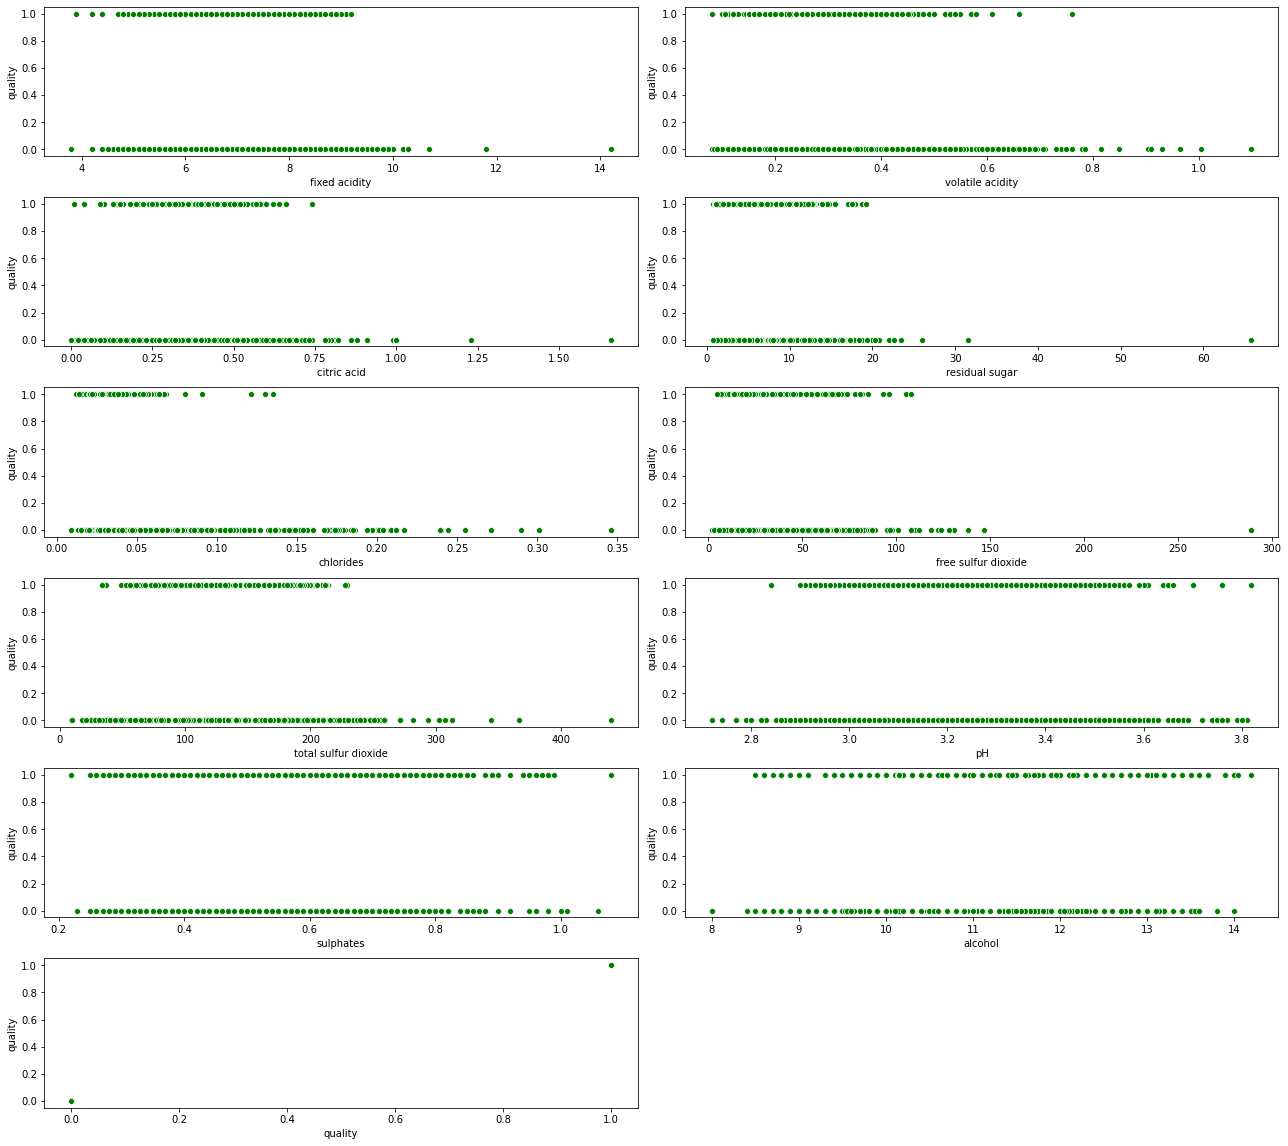

In [311]:
fig = plt.figure(figsize=(18,16))
for index in range(len(data_file.columns)):
    plt.subplot(6,2,index+1)
    sns.scatterplot(x = data_file.iloc[:, index], y='quality', data = data_file, color="Green")
fig.tight_layout(pad = 1)

In [342]:
#removing extreme outliers
data_file = data_file.drop(data_file[data_file["fixed acidity"] > 11].index)
data_file = data_file.drop(data_file[data_file["citric acid"] > 1.1].index)
data_file = data_file.drop(data_file[data_file["chlorides"] > 0.3].index)
data_file = data_file.drop(data_file[data_file["residual sugar"] > 30].index)
data_file = data_file.drop(data_file[data_file["free sulfur dioxide"] > 250].index)
data_file = data_file.drop(data_file[data_file["total sulfur dioxide"] > 300].index)
data_file = data_file.drop(data_file[data_file["volatile acidity"] > 0.8].index)

In [358]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
 
from sklearn.model_selection import GridSearchCV

In [344]:
#first we shall split our data into train and test categories
#and scale it...

y = data_file['quality']
X = data_file.drop(['quality'],axis = 1)
scaler = preprocessing.StandardScaler()
cols = X.columns 
X =pd.DataFrame(X,columns = cols)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.22,random_state = 5)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [345]:
models_accuracy = dict()

In [346]:
logisticReg = LogisticRegression(penalty='elasticnet',C= 0.06,solver='saga', max_iter=100, multi_class ='ovr',l1_ratio=1)
logisticReg.fit(X_train,y_train)
y_pred =logisticReg.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       983
           1       0.24      0.59      0.34        90

    accuracy                           0.81      1073
   macro avg       0.60      0.71      0.62      1073
weighted avg       0.90      0.81      0.84      1073



In [347]:
models_accuracy["Logistic Regression"] = accuracy_score(y_pred,y_test)
print(models_accuracy["Logistic Regression"])


0.809878844361603


In [348]:
params_SVC ={
    'C': [0.01, 0.05, 0.07, 0.1, 0.5, 0.7, 1.0, 1.5,2.0,5.0,10.0],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            
    }
SVCModel = SVC()

grid_SVC = GridSearchCV(estimator = SVCModel,
                      param_grid = params_SVC,
                      cv=10,
                      scoring="accuracy",
                       n_jobs=-1)
grid_SVC.fit(X_train, y_train)
y_pred = grid_SVC.predict(X_test)
print(grid_SVC.best_params_)
print(grid_SVC.best_score_)
print(classification_report(y_pred,y_test))


{'C': 5.0, 'kernel': 'rbf'}
0.8288112999033015
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       928
           1       0.45      0.69      0.55       145

    accuracy                           0.85      1073
   macro avg       0.70      0.78      0.73      1073
weighted avg       0.88      0.85      0.86      1073



In [349]:
models_accuracy["SVC"] = accuracy_score(y_pred,y_test)
print(models_accuracy["SVC"])


0.8462255358807083


In [359]:
params_adaboost = {'n_estimators':[50,100,150,200,250],
            'learning_rate':[0.01,0.05,0.1,0.5,1.0, 2.0, 5.0],
            }
adaboostModel = AdaBoostClassifier()
grid_adaboostModel  = GridSearchCV(estimator = adaboostModel,
                      param_grid = params_adaboost,
                      cv=5,
                      scoring = 'accuracy',
                      n_jobs = -1)
grid_adaboostModel.fit(X_train, y_train)
y_pred =grid_adaboostModel.predict(X_test)
print(grid_adaboostModel.best_params_)
print(grid_adaboostModel.best_score_)
print(classification_report(y_pred,y_test))

{'learning_rate': 0.5, 'n_estimators': 250}
0.8035735528044816
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       895
           1       0.48      0.60      0.53       178

    accuracy                           0.83      1073
   macro avg       0.70      0.73      0.71      1073
weighted avg       0.84      0.83      0.83      1073



In [360]:
models_accuracy["AdaBoost"] = accuracy_score(y_pred,y_test)
print(models_accuracy["AdaBoost"])

0.8266542404473439


In [350]:
params_rf = {'n_estimators':[100,200,300,400,500],
            'max_depth':[4,6,8,10,12,14,17,20],
            'max_features':['log2','sqrt']}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(estimator = rf,
                      param_grid = params_rf,
                      cv=5,
                      scoring = 'accuracy',
                      n_jobs = -1)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print(grid_rf.best_params_)
print(grid_rf.best_score_)
print(classification_report(y_pred,y_test))

{'max_depth': 14, 'max_features': 'log2', 'n_estimators': 500}
0.8724666297807595
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       907
           1       0.59      0.78      0.67       166

    accuracy                           0.88      1073
   macro avg       0.77      0.84      0.80      1073
weighted avg       0.90      0.88      0.89      1073



In [351]:
models_accuracy["Random Forest"] = accuracy_score(y_pred,y_test)
print(models_accuracy["Random Forest"])

0.8825722273998136


<BarContainer object of 4 artists>

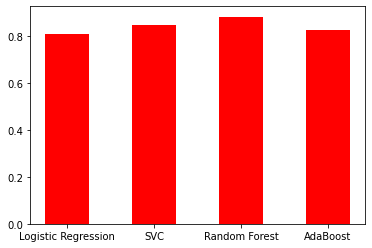

In [361]:
plt.bar(models_accuracy.keys(), models_accuracy.values(), width = 0.5, color='red')